<a href="https://www.kaggle.com/code/kalilurrahman/ipl-player-auction-data-analysis?scriptVersionId=108043727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly
from plotly.offline import plot, iplot
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/ipl-player-auction-dataset-from-start-to-now/IPLPlayerAuctionData.csv


In [2]:
iplauction = pd.read_csv("../input/ipl-player-auction-dataset-from-start-to-now/IPLPlayerAuctionData.csv")
iplauction

Player     Role    Amount                         Team  \
0               Aaron Finch  Batsman  40000000          Sunrisers Hyderabad   
1               Aaron Finch  Batsman  32000000               Mumbai Indians   
2               Aaron Finch  Batsman  10000000                Gujarat Lions   
3               Aaron Finch  Batsman  62000000              Kings XI Punjab   
4               Aaron Finch  Batsman  44000000  Royal Challengers Bangalore   
..                      ...      ...       ...                          ...   
965  Yuzvendra Singh Chahal   Bowler   1000000  Royal Challengers Bangalore   
966  Yuzvendra Singh Chahal   Bowler  60000000  Royal Challengers Bangalore   
967             Zaheer Khan   Bowler  26000000               Mumbai Indians   
968             Zaheer Khan   Bowler  40000000             Delhi Daredevils   
969      Zahir Khan Pakteen   Bowler   6000000             Rajasthan Royals   

       Year Player Origin  
0    2014.0      Overseas  
1    2015.0      Overseas  
2    2016.0      Overseas  
3    2018.0      Overseas  
4    2020.0      Overseas  
..      ...           ...  
965  2014.0        Indian  
966  2018.0        Indian  
967  2014.0        Indian  
968  2015.0        Indian  
969  2018.0        Indian  

[970 rows x 6 columns]

In [3]:
iplauction.isnull().sum()
iplauction.dropna(inplace=True)
iplauction.Year = iplauction.Year.apply(int)
iplauction.Amount = iplauction.Amount.apply(int)

In [4]:
data = iplauction.groupby('Year')['Amount'].sum()
fig = px.line(data, x = data.index, y = 'Amount', title = "Overall Expense Each year", text=data.index)
fig.update_traces(textposition="top right")
fig.show()
#print(data.head())
#data['Amount'] = data['Amount'].div(10000000).round(0)
data = data.div(10000000)
fig = px.bar(data, x = data.index, y = 'Amount', title = "Overall Expense Each year (in Crores)",
             text= 'Amount',color=data.index)
fig.show()


In [5]:
data = iplauction[['Player','Amount','Year']].sort_values("Amount", axis = 0, ascending = False)[:10]
data

Player     Amount  Year
187  Christopher Morris  162500000  2021
960        Yuvraj Singh  160000000  2015
632         Pat Cummins  155000000  2020
311        Ishan Kishan  152500000  2022
455       Kyle Jamieson  150000000  2021
137     Benjamin Stokes  145000000  2017
280       Glenn Maxwell  142500000  2021
222       Deepak Chahar  140000000  2022
368     Jhye Richardson  140000000  2021
959        Yuvraj Singh  140000000  2014

In [6]:
fig =px.bar(data.head(100), y="Player", x="Amount", color='Year',orientation='h',text='Amount', height=600)
fig.update_layout(title_text = "Top-10 Auction Buys")
fig.show()

In [7]:
data = iplauction[['Player','Amount','Year']].sort_values("Amount", axis = 0, ascending = False)
#data = data[:20].sort("Amount",ascending=0)
print(data.head())
#data=data.drop_index()
#data.head(20).plot(kind='barh')
fig =px.bar(data.head(100), y="Player", x="Amount", color='Year',orientation='h',text='Amount', height=2000)
fig.update_layout(title_text = "Top-100 Auction Buys")
fig.show()




                 Player     Amount  Year
187  Christopher Morris  162500000  2021
960        Yuvraj Singh  160000000  2015
632         Pat Cummins  155000000  2020
311        Ishan Kishan  152500000  2022
455       Kyle Jamieson  150000000  2021


In [8]:
data = pd.DataFrame(iplauction.groupby(['Team', 'Year'])['Amount'].sum()).reset_index()

#data = data.sort_values(by='Amount', ascending=False)
#fig = px.line(data, x='Year', y='Amount', color='Team', symbol='Team')

data =data.sort_values(by='Amount', ascending=False,
               key=lambda x: data['Year'].groupby(x).transform('sum'))
#print(data.head())
fig = px.bar(data, x='Team', y='Amount', color='Year')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()
fig = px.line(data, x='Team', y='Amount', color='Year', symbol='Team')
#fig = px.bar(data, x='Year', y='Amount', color='Team')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()


In [9]:
data = pd.DataFrame(iplauction.groupby(['Team', 'Year'])['Amount'].sum()).reset_index()
#fig = px.line(data, x='Year', y='Amount', color='Team', symbol='Team')
fig = px.bar(data, x='Year', y='Amount', color='Team')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()
fig = px.line(data, x='Year', y='Amount', color='Team', symbol='Team')
#fig = px.bar(data, x='Year', y='Amount', color='Team')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()

In [10]:
teams = iplauction.Team.unique()

import plotly.graph_objects as go
for team in teams:
    data = iplauction[iplauction['Team'] == team].groupby('Year')['Amount'].sum().to_frame('Amount').reset_index()
    fig = px.line(data, x = data.index, y = 'Amount', title = f"{team}'s spent amount", text=data.index)
    #fig.add_bar(x = data.index, y = 'Amount')
    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = 'Year', y = 'Amount', color='Year')#, symbol='Team')
    fig.update_layout(title_text = f"{team}'s spent amount")
    fig.show()

In [11]:
origins = iplauction['Player Origin'].unique()
for origin in origins:
    data = iplauction[iplauction['Player Origin'] == origin].groupby('Year')['Amount'].sum()
    fig = px.line(data, x = data.index, y = 'Amount', title = f"{origin}'s spent amount", text=data.index)
    #fig.add_bar(x = data.index, y = data['Amount'])
    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = data.index, y = 'Amount', title = f"{origin}'s spent amount", text=data.index)
    fig.update_layout(title_text = f"{origin}'s spent amount")
    fig.show()

In [12]:
roles= iplauction['Role'].unique()
for role in roles:
    data = iplauction[iplauction['Role'] == role].groupby('Year')['Amount'].sum()
    fig = px.line(data, x = data.index, y = 'Amount', title = f"{role}'s spent amount", text=data.index)
    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = data.index, y = 'Amount', title = f"{role}'s spent amount", text=data.index)
    fig.update_layout(title_text = f"{role}'s spent amount")
    fig.show()

In [13]:
import plotly.express as px
sort_vals = iplauction.sort_values(by='Amount',ascending=False) #.head(50)
fig = px.bar(sort_vals, x="Team", y="Amount", 
             color="Role", barmode = 'group')
  
fig.show()


In [14]:
fig = px.bar(sort_vals, x="Team", y="Amount", 
             color="Year", barmode = 'group')
  
fig.show()

In [15]:

group_vals = sort_vals.groupby('Player').head(25)
#print(group_vals.head())
fig = px.bar(group_vals.head(25), x="Player", y="Amount", 
             color="Year", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [16]:

group_vals = sort_vals.groupby('Team').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Team", y="Amount", hover_data=['Year','Amount','Role'],
             color="Role", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [17]:

group_vals = sort_vals.groupby('Team').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Year", y="Amount", hover_data=['Year','Amount','Role'],
             color="Team", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [18]:

group_vals = sort_vals.groupby('Role').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Role", y="Amount", hover_data=['Amount','Role'],
             color="Team", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [19]:

group_vals = sort_vals.groupby('Role').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Year", y="Amount", hover_data=['Amount','Role'],
             color="Team", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

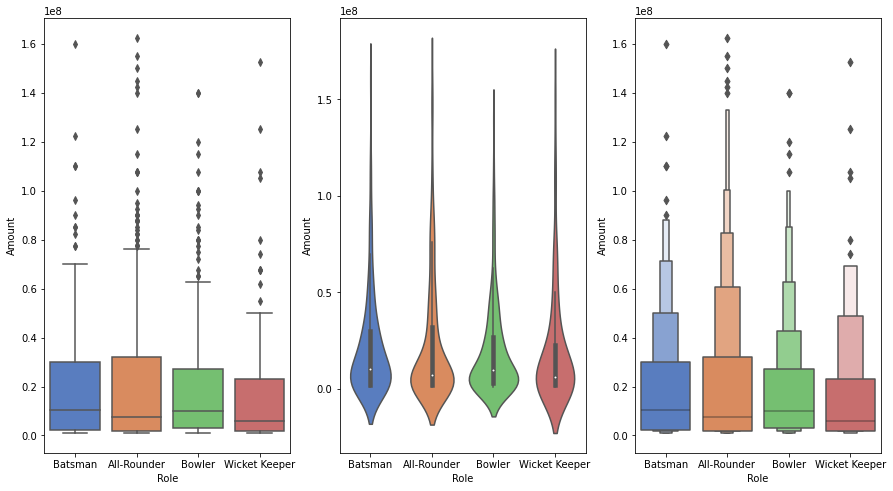

In [20]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 8))
sns.boxplot(x='Role', y='Amount', data=iplauction, palette="muted", ax =ax[0])
sns.violinplot(x='Role', y='Amount', data=iplauction, palette="muted", ax =ax[1])
sns.boxenplot(x='Role', y='Amount', data=iplauction, palette="muted", ax =ax[2])
#ax.set_ylim([0, 0.4e8])
plt.show()

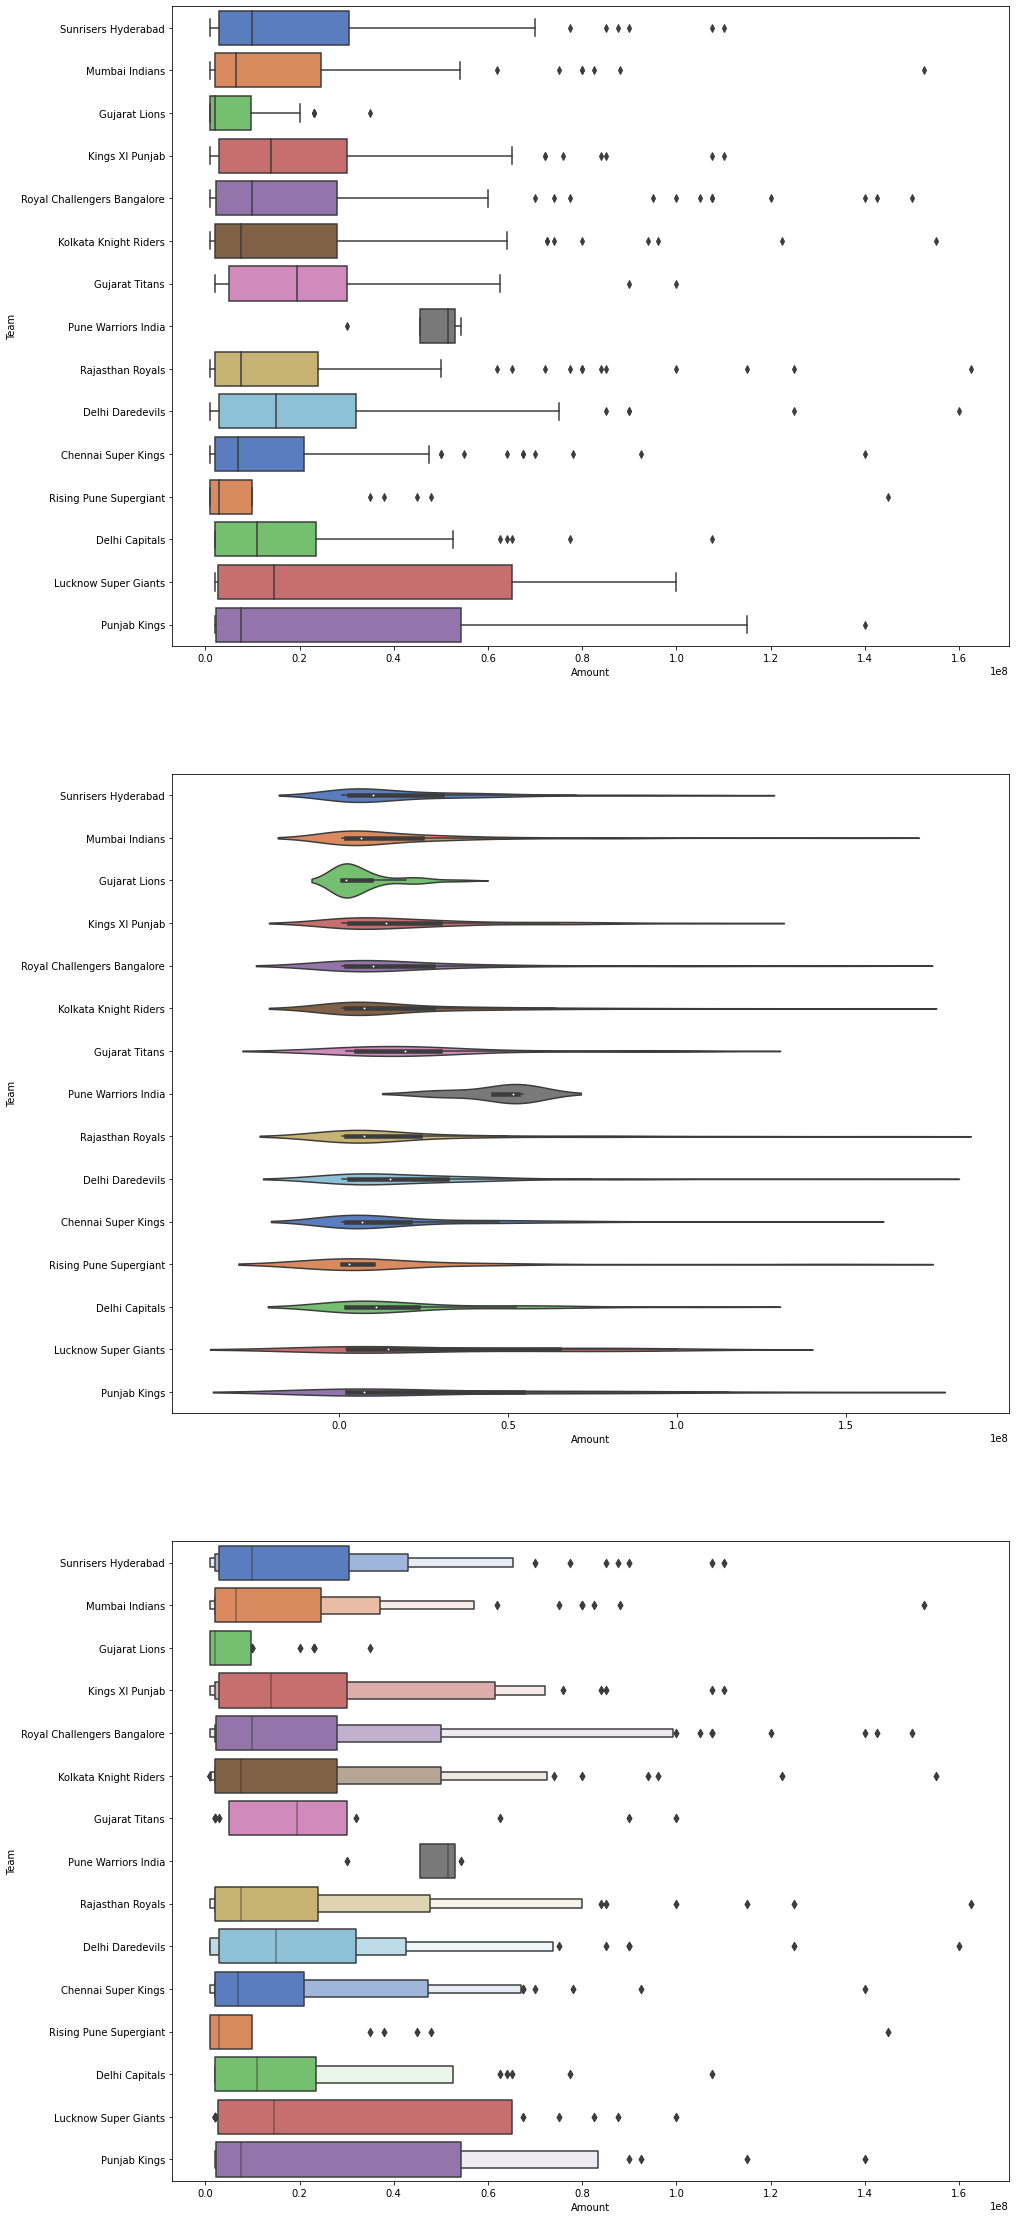

In [21]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 40))
sns.boxplot(y='Team', x='Amount', data=iplauction, palette="muted", ax =ax[0])
sns.violinplot(y='Team', x='Amount', data=iplauction, palette="muted", ax =ax[1])
sns.boxenplot(y='Team', x='Amount', data=iplauction, palette="muted", ax =ax[2])
#ax.set_ylim([0, 0.4e8])
plt.show()

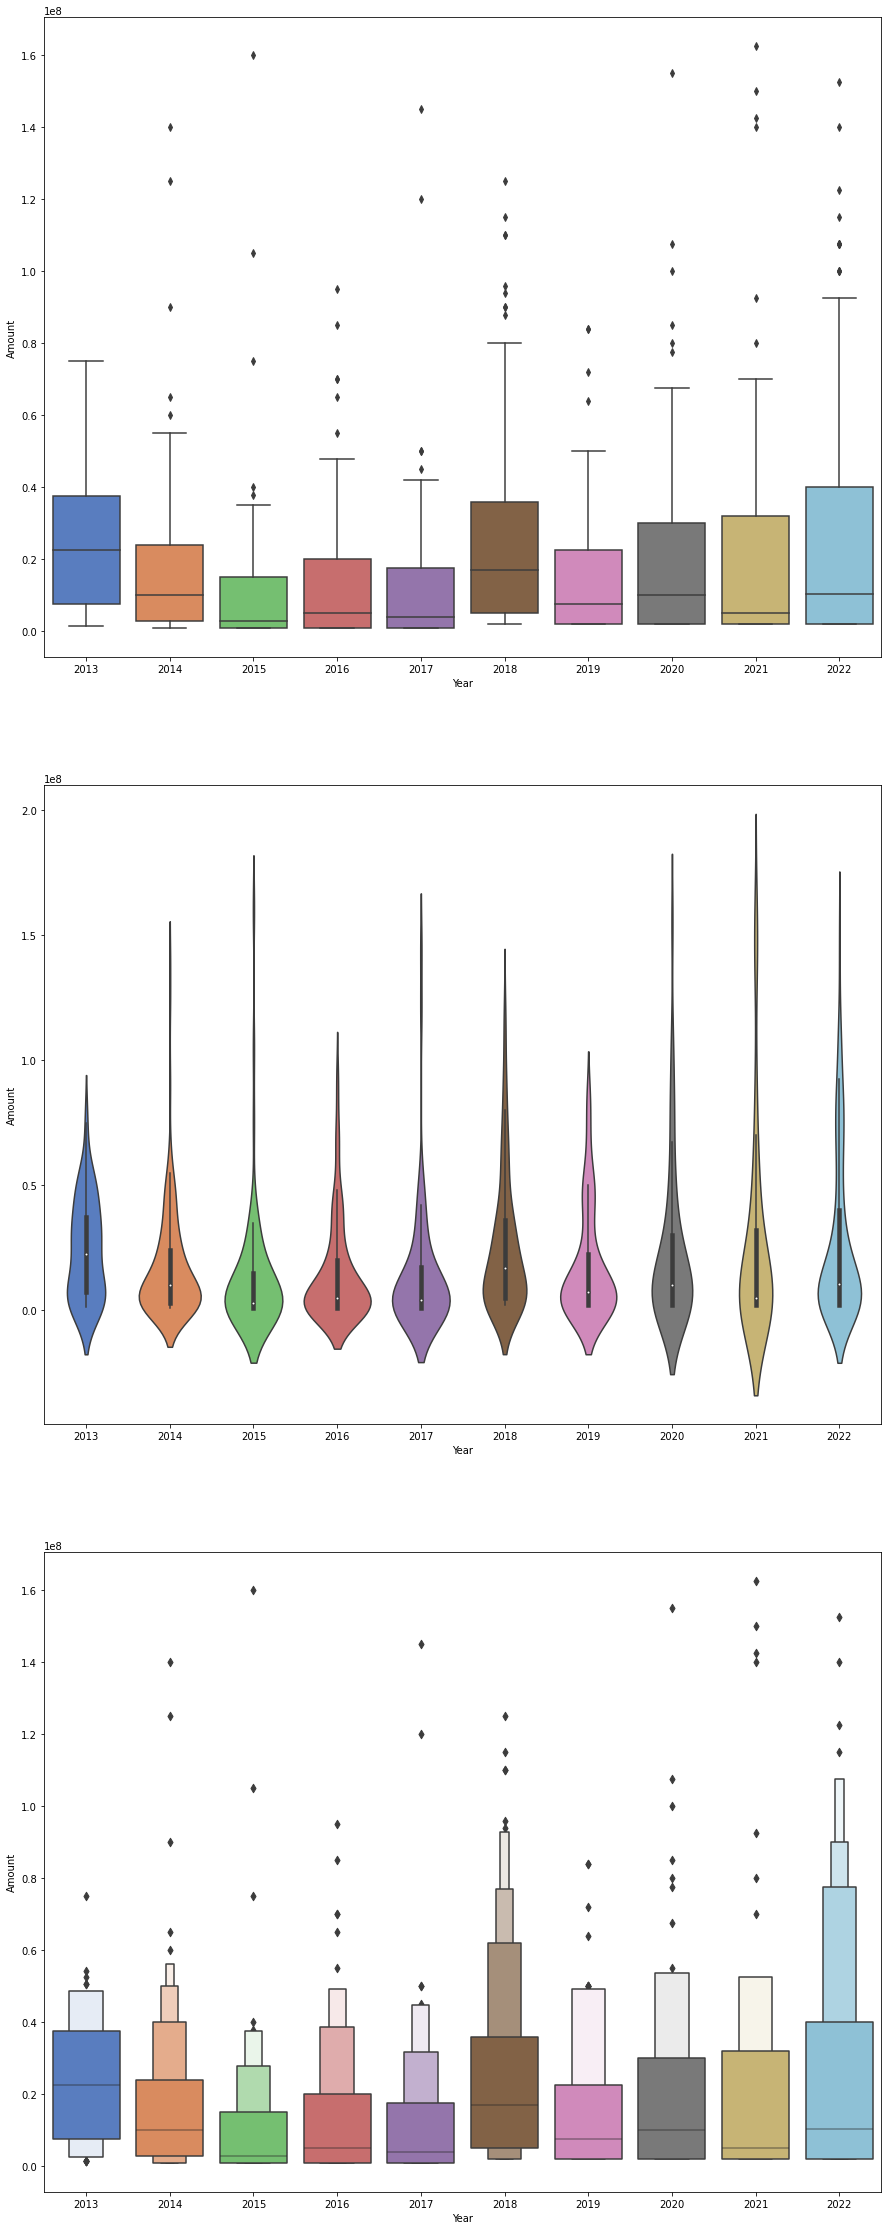

In [22]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 40))
sns.boxplot(x='Year', y='Amount', data=iplauction, palette="muted", ax =ax[0])
sns.violinplot(x='Year', y='Amount', data=iplauction, palette="muted", ax =ax[1])
sns.boxenplot(x='Year', y='Amount', data=iplauction, palette="muted", ax =ax[2])
#ax.set_ylim([0, 0.4e8])
plt.show()

## The value is spreading more wider and thinner as the year progresses

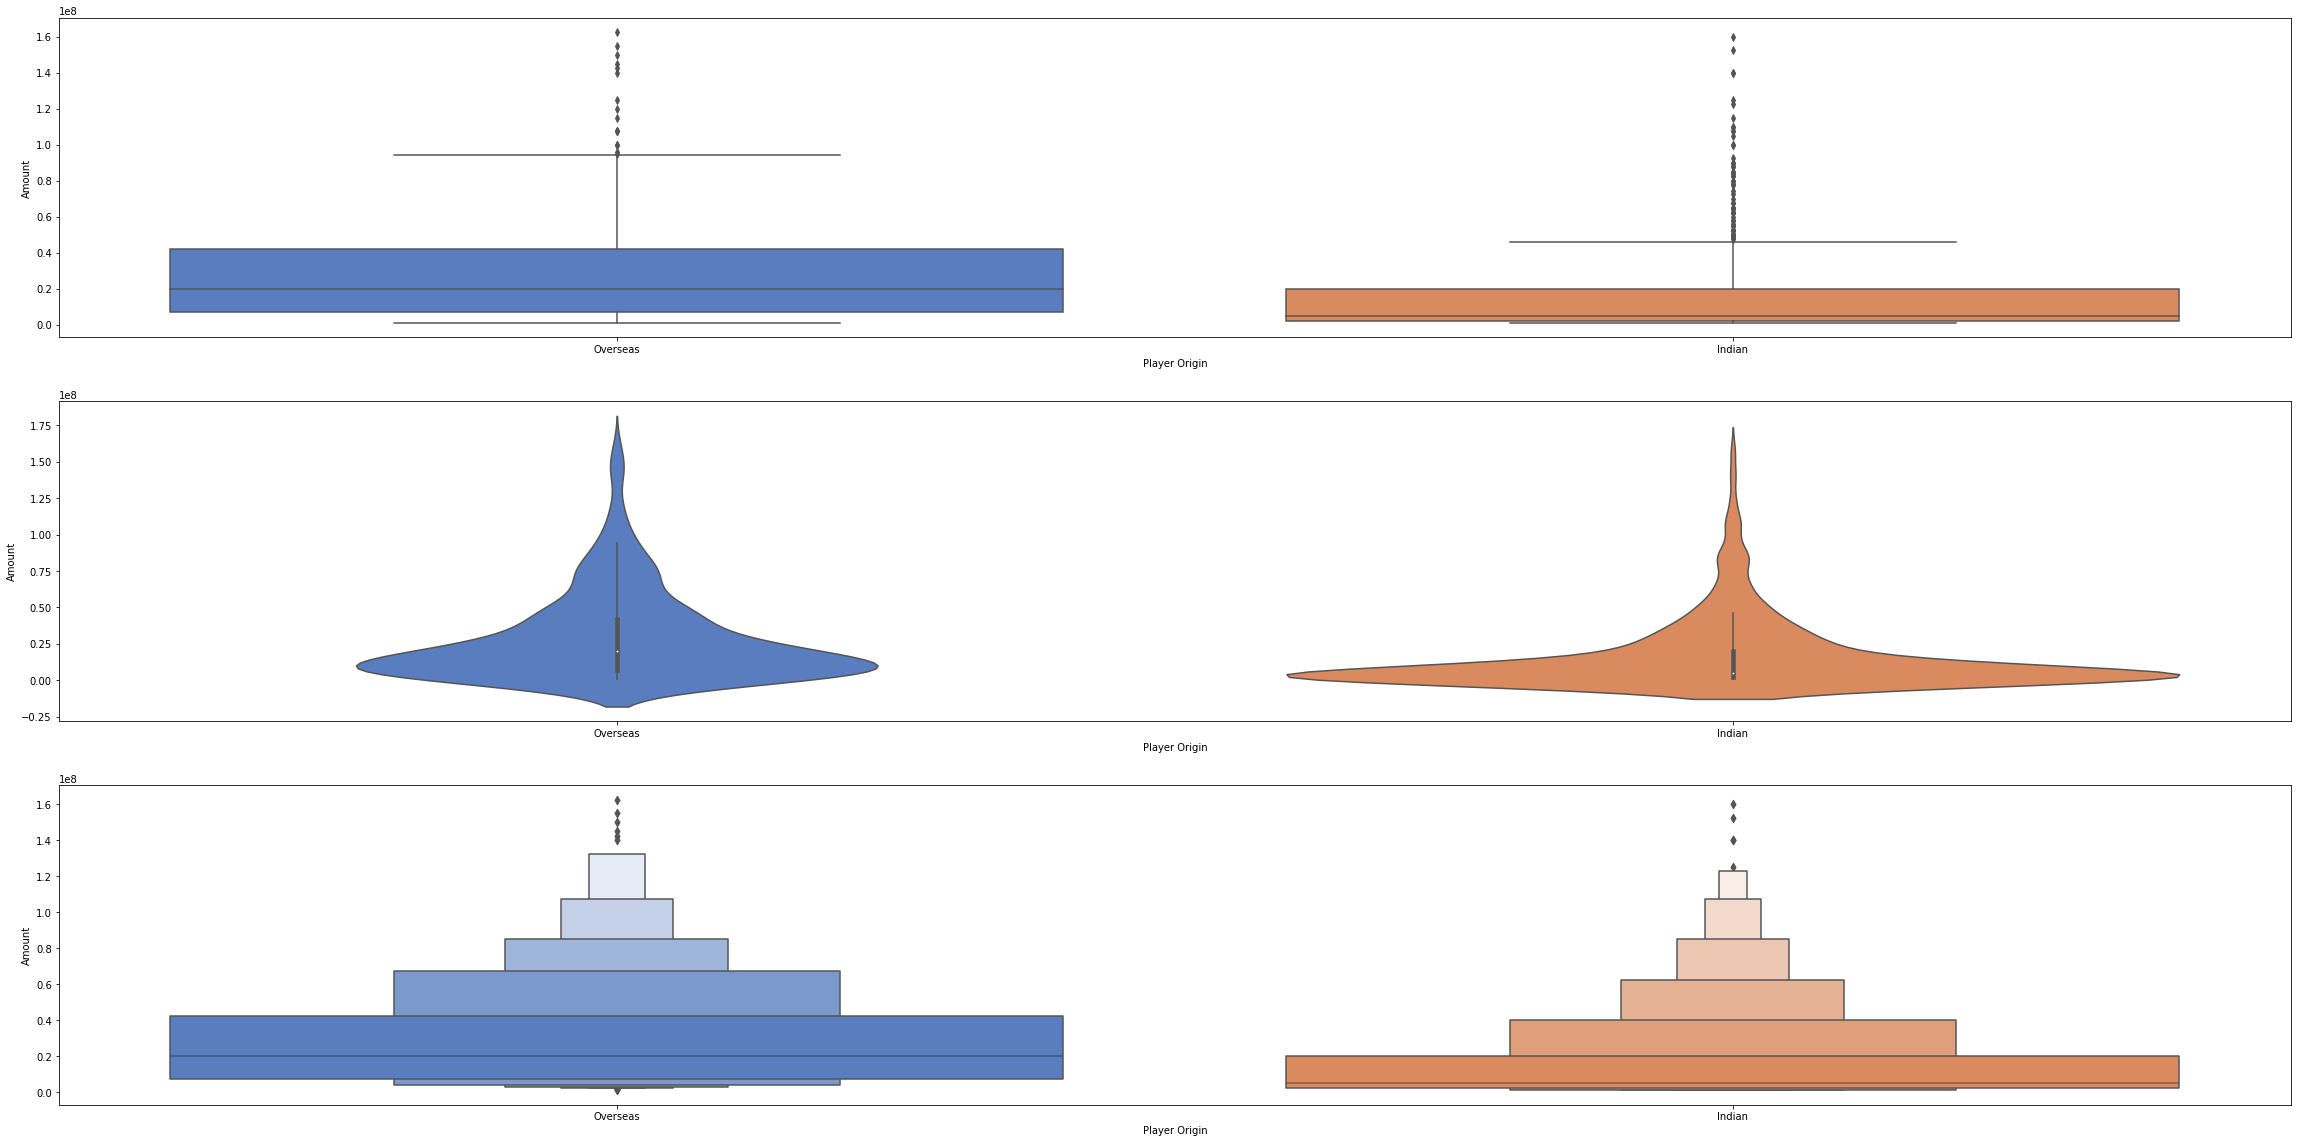

In [23]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(40, 20))
sns.boxplot(x='Player Origin', y='Amount', data=iplauction, palette="muted", ax =ax[0])
sns.violinplot(x='Player Origin', y='Amount', data=iplauction, palette="muted", ax =ax[1])
sns.boxenplot(x='Player Origin', y='Amount', data=iplauction, palette="muted", ax =ax[2])
#ax.set_ylim([0, 0.4e8])
plt.show()

## Overseas Players get more money than their Indian Counterparts

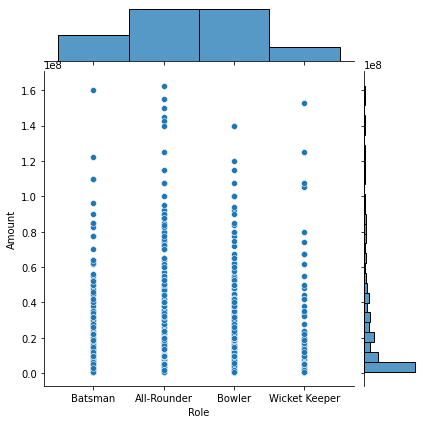

In [24]:
sns.jointplot(x='Role', y='Amount', data=iplauction)
plt.show()

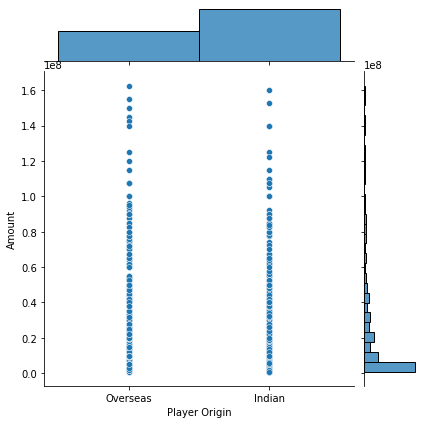

In [25]:
sns.jointplot(x='Player Origin', y='Amount', data=iplauction)
plt.show()

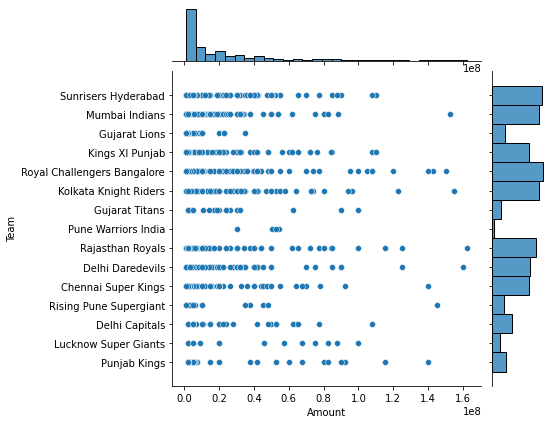

In [26]:
sns.jointplot(y='Team', x='Amount', data=iplauction)
plt.show()

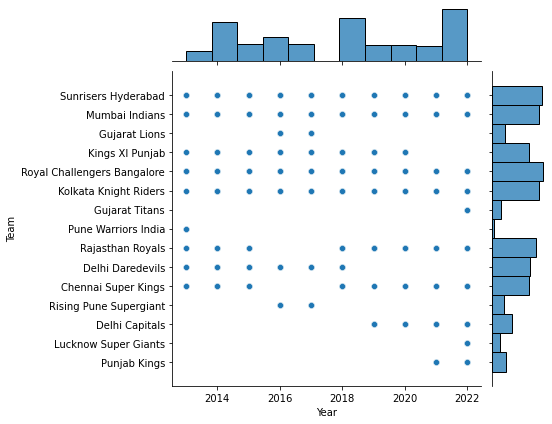

In [27]:
sns.jointplot(y='Team', x='Year', data=iplauction)
plt.show()

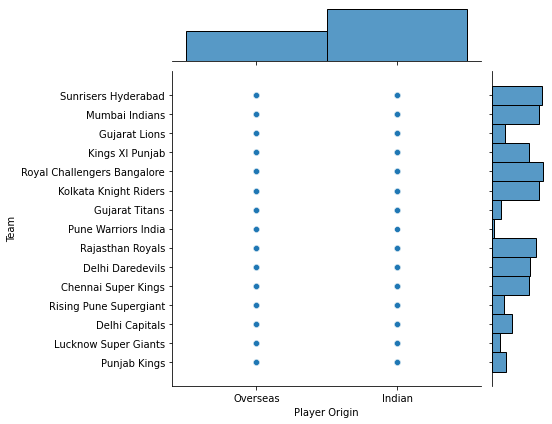

In [28]:
sns.jointplot(x='Player Origin', y='Team', data=iplauction)
plt.show()

## Let us try  networkx diagram

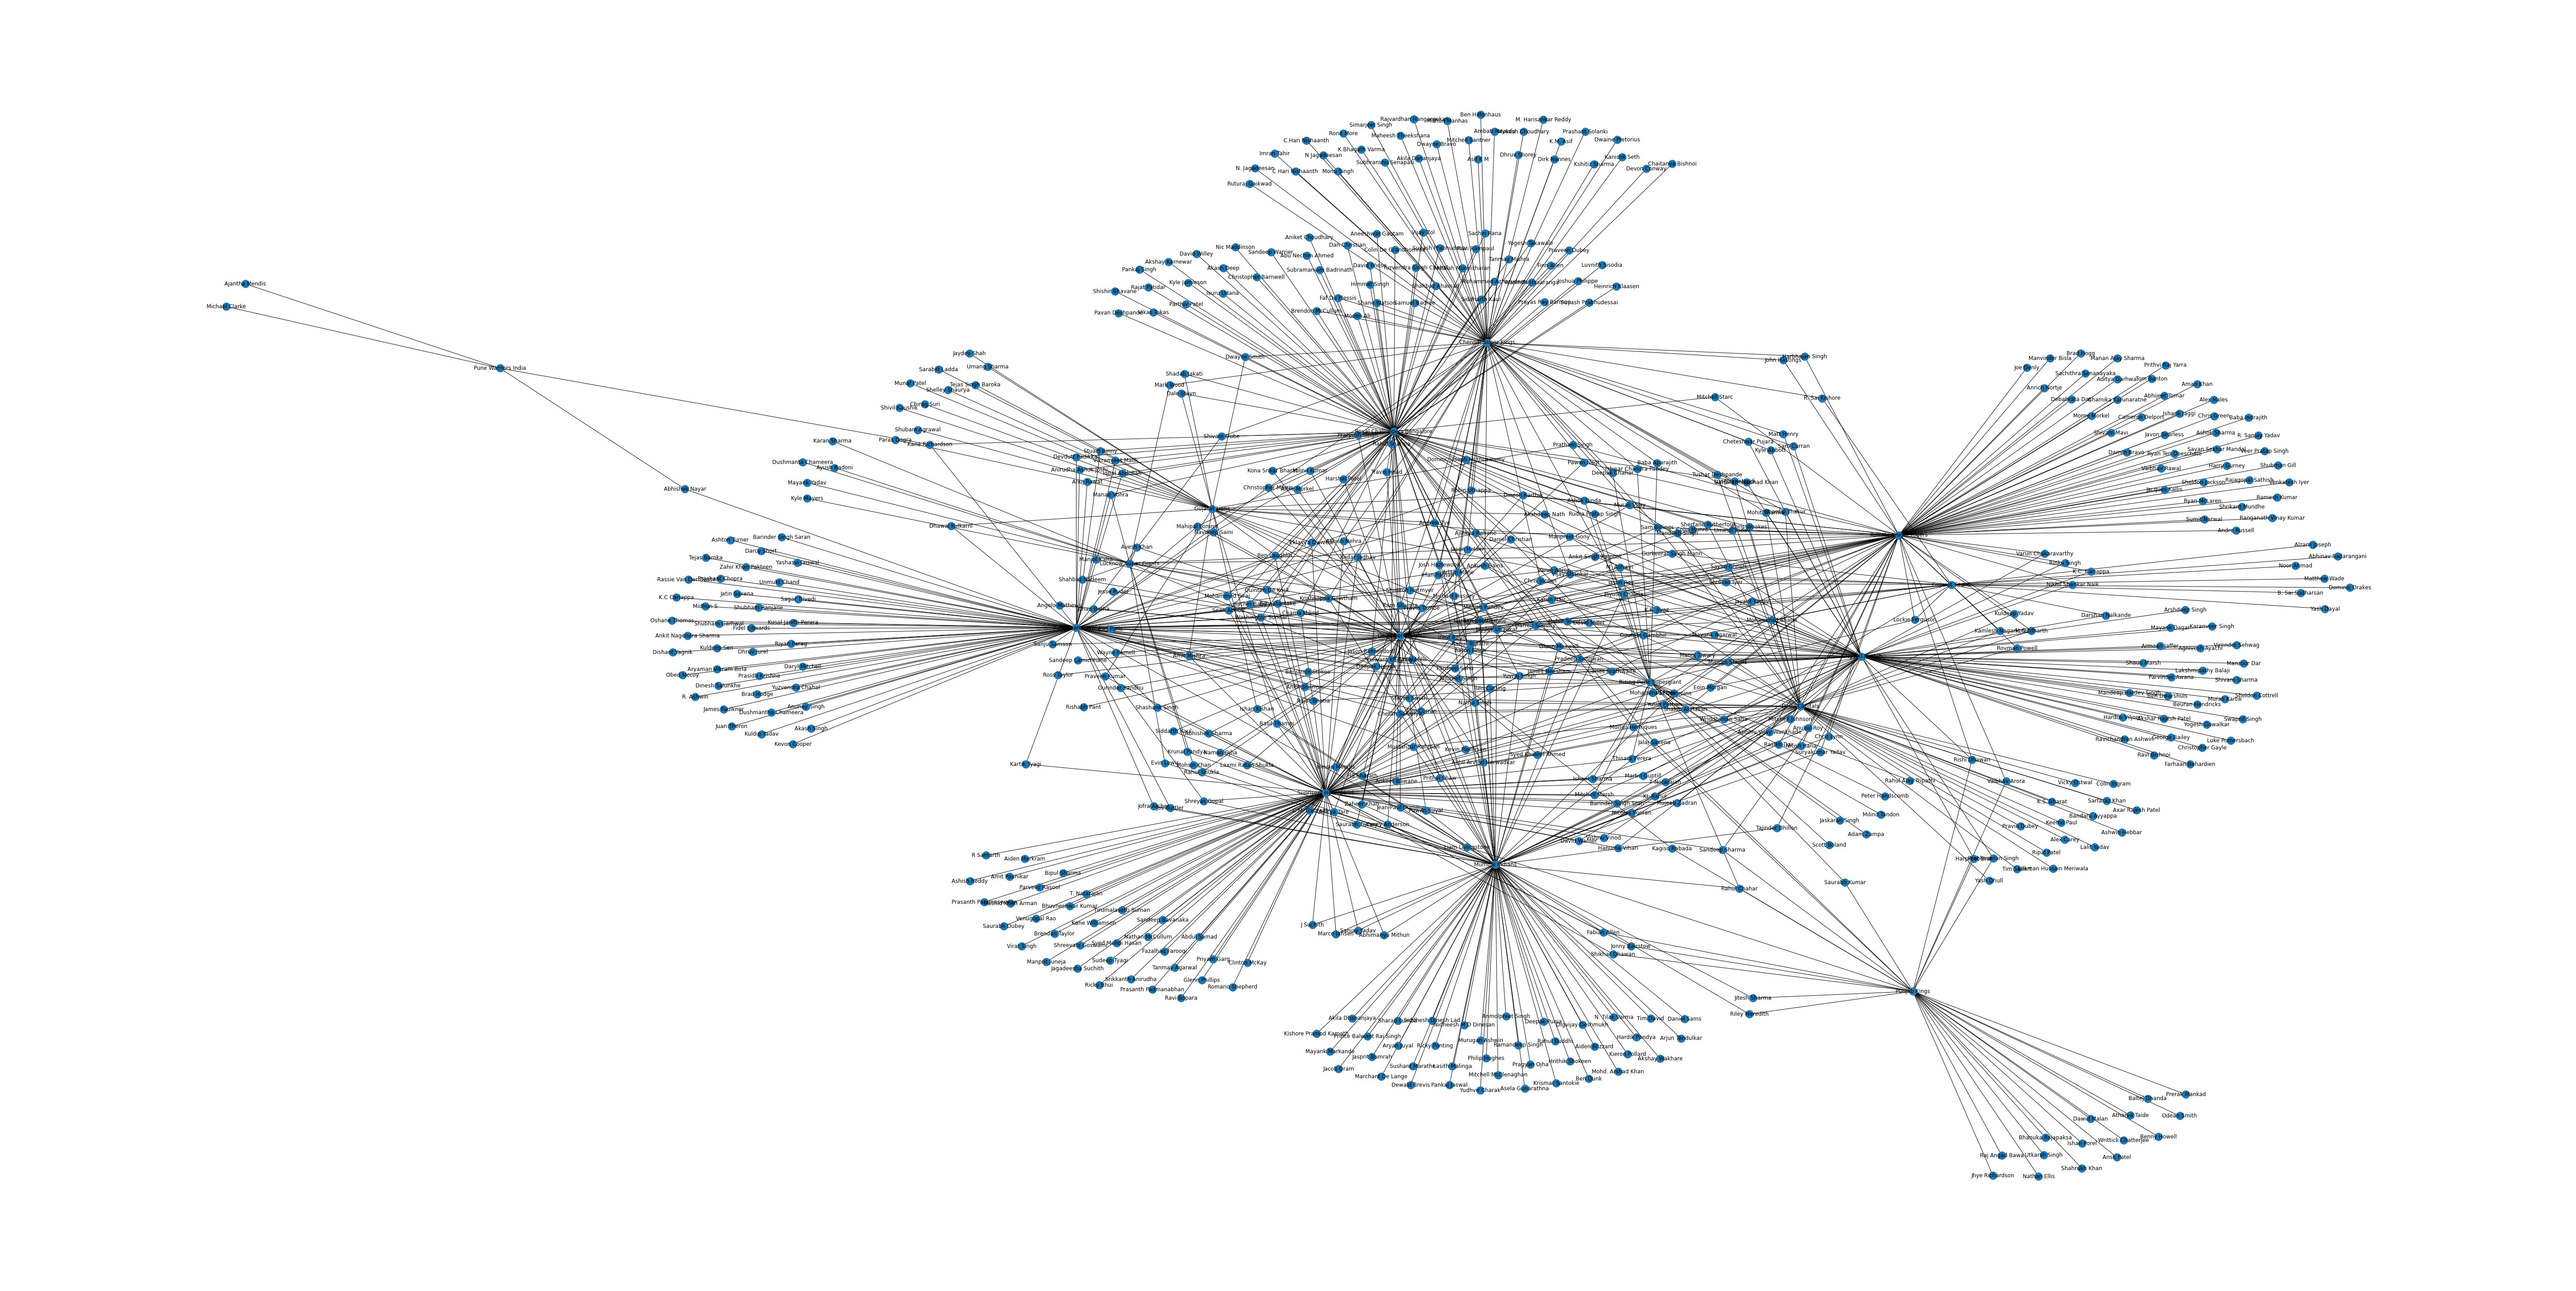

In [29]:

edges = list(zip(iplauction['Team'], iplauction['Player']))


import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(80, 40))
nx.draw(G, with_labels=True)
